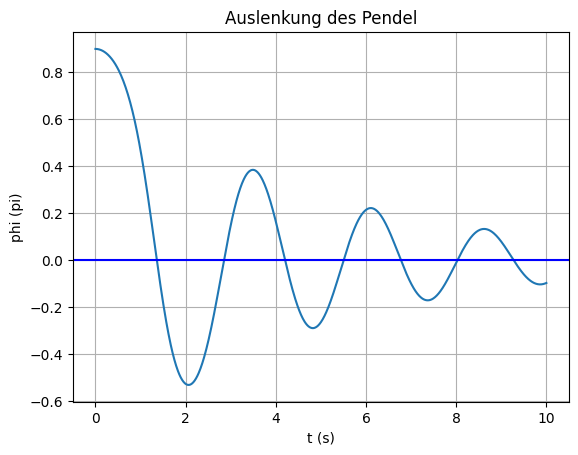

In [1]:
import math
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def DGL(t, state, param):
    
    phi, phi_dot = state
    g, l = param
    rhs = [phi_dot, -(g/l) * math.sin(phi)-0.4*(phi_dot)]
    return rhs


g = 9.81
l = 1.5
m = 35

phi_0 = 2.8274 #math.pi/2
phi_dot_0 = 0.0

param = [g,l]
initval= [phi_0, phi_dot_0]

tstop = 10
tinc = 0.01
tlist = np.arange(0.0, tstop+tinc, tinc)

sol = solve_ivp(DGL, (0.0, tstop), initval, method="RK45", t_eval= tlist, args = (param,))

t = sol.t
philist = [math.degrees(i)/180 for i in sol.y[0]] # sol.y[0]
phidotlist =  [i/math.pi for i in sol.y[1]]  #sol.y[1]  #[i*l for i in sol.y[1]] 
# Einheit von phidot ist omega, was rad/s ist, das müsssen wir erstmal als m/s umschreiben: v=wr =>

fig, ax = plt.subplots()
plt.grid()
plt.rcParams["figure.figsize"] = (5,3)
ax.plot(t, philist)
ax.set_title("Auslenkung des Pendel")
ax.set_xlabel("t (s)")
ax.set_ylabel("phi (pi)")
ax.axhline(0, color='blue')
# By default, everything is non-angular!!


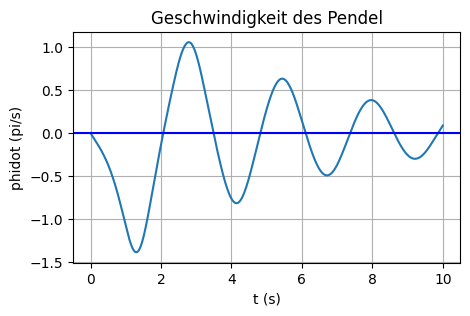

In [2]:
fig, ax = plt.subplots()
plt.grid()
plt.rcParams["figure.figsize"] = (5,3)
ax.plot(t, phidotlist)
ax.set_title("Geschwindigkeit des Pendel")
ax.set_xlabel("t (s)")
ax.set_ylabel("phidot (pi/s)")
ax.axhline(0, color='blue')

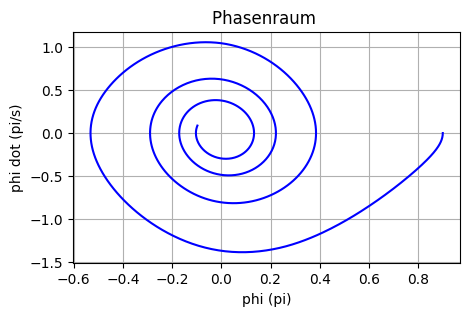

In [3]:
philist = [math.degrees(i)/180 for i in sol.y[0]] # sol.y[0]
phidotlist =  [i/math.pi for i in sol.y[1]]  #sol.y[1]  #[i*l for i in sol.y[1]] 


fig = plt.figure(1)
plt.rc("axes", axisbelow= True) # Anpassungen von Plot - Optionen
plt.grid() # Definition eines Rasters
plt.xlabel(r"phi (pi)") # Beschriftung "x - Achse "
plt.ylabel(r"phi dot (pi/s)") # Beschriftung "y - Achse "
plt.title("Phasenraum ") # Plot - Titel
plt.plot(philist, phidotlist, color ="blue") # Plotbefehl

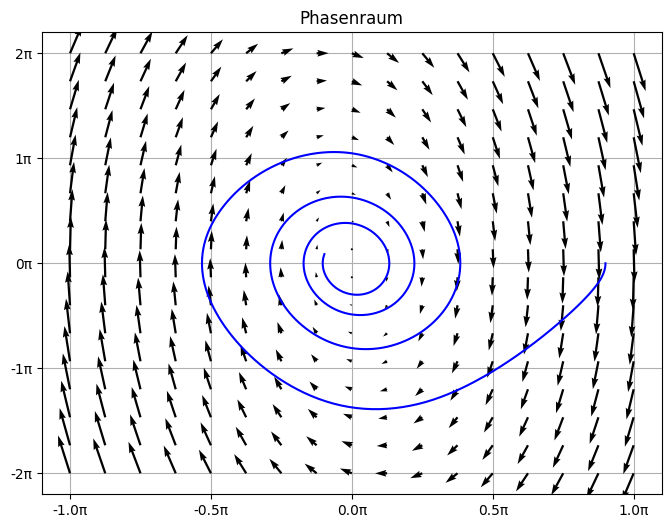

In [4]:
xlist = np.linspace(-1, 1, num=17)
ylist = np.linspace(-2.0,2.0, num =16, endpoint= True )
xgrid, ygrid = np.meshgrid(xlist, ylist)

ni, nj = xgrid.shape

vec_x, vec_y = np.zeros((ni,nj)),np.zeros((ni, nj))

for i in range(ni):
    for j in range (nj):
        koor = [xgrid[i ,j], ygrid[i, j]]
        vec_x[i,j ], vec_y[i,j] = DGL(0.0, koor, param)


fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(philist, phidotlist, color="blue")
ax.quiver(xgrid, ygrid, vec_x, vec_y)
#ax.set_ylim(-2, 2)
#ax.set_xlabel(r"phi (pi)")
#ax.set_ylabel(r"phi dot (pi/s)")

xticks = [-1, -0.5, 0, 0.5, 1]
xticklabels = ['{:.1f}π'.format(x) for x in xticks]
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels)



yticks = np.linspace(-2, 2, num=5)
yticklabels = ['{:.0f}π'.format(x) for x in yticks]
ax.set_yticks(yticks)
ax.set_yticklabels(yticklabels)


ax.set_title("Phasenraum")
ax.grid()
